## Forecasting Timeseries Data Using Facebook FbProphet

* **Steps Required With FbProphet**

    1. Introduction And Installation
    2. Data Preprocessing With Time Series
    3. Model Fitting
    4. Obtaining The Forecasts
    5. Plotting The Forecasts
    6. Cross Validation
    7. Computing Performance Metrics
    8. Visualize the Performance Metrics
    9. Conclusions

**Create a new Conda Environment and then Install these packages in that Environment**

In [ ]:
# pip install pystan
# conda install -c conda-forge fbprophet

* Execute the below line twice if working in Python 3.7 version. (Plotly fails the first time)

In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [ ]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [ ]:
df.drop(168,axis=0,inplace=True)
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [ ]:
df.columns=["ds","y"]
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


<AxesSubplot:>

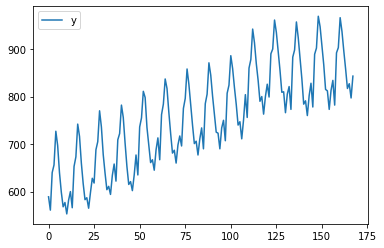

In [ ]:
df.plot()

* Changing the 'ds' string to a date time format because fbprophet requires datetime format.

In [ ]:
df['ds']=pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

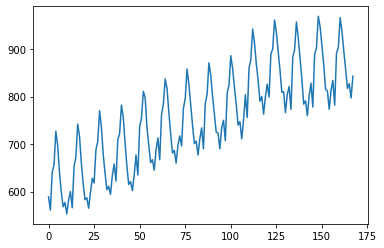

In [ ]:
df['y'].plot()

* We usually convert this data into stationery and hence we are using the shift function to shift the 'y' values 1 row down but **FBprophet does not require the shifting of the data**

In [ ]:
# df['y'].shift(1)

In [ ]:
# df['y'] = df['y'] - df['y'].shift(1)
# df.head()

* **If after 1 shift, it does turn into stationary so we keep on shifting unless we make the data stationary**

* Ditifuller Test **(Check it Out)**

In [ ]:
from fbprophet import Prophet

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [ ]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


### Intializing the Model

* Prophet assumes that you have your datetime feature in the 1st column and the output in the 2nd Column.

* Arrange your data accordingly

In [ ]:
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* Seasonality in the dataset is monthly but fbprophet is taking yearly.

In [ ]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Create future dates of 365 days - Forecasting

In [ ]:
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [ ]:
future_dates.tail(20)

,ds
513,1976-11-11
514,1976-11-12
515,1976-11-13
516,1976-11-14
517,1976-11-15
518,1976-11-16
519,1976-11-17
520,1976-11-18
521,1976-11-19
522,1976-11-20


#### Prediction for future 365 days

In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.822820,576.524614,596.124699,606.822820,606.822820,-20.087336,-20.087336,-20.087336,-20.087336,-20.087336,-20.087336,0.0,0.0,0.0,586.735484
1,1962-02-01,608.548015,535.915651,554.950672,608.548015,608.548015,-62.524137,-62.524137,-62.524137,-62.524137,-62.524137,-62.524137,0.0,0.0,0.0,546.023878
2,1962-03-01,610.106255,631.214708,651.751273,610.106255,610.106255,31.424792,31.424792,31.424792,31.424792,31.424792,31.424792,0.0,0.0,0.0,641.531047
3,1962-04-01,611.831450,648.376485,668.287253,611.831450,611.831450,46.750890,46.750890,46.750890,46.750890,46.750890,46.750890,0.0,0.0,0.0,658.582340
4,1962-05-01,613.500993,712.155900,730.829292,613.500993,613.500993,108.080865,108.080865,108.080865,108.080865,108.080865,108.080865,0.0,0.0,0.0,721.581858


* **yhat is the predicted value, yhat_lower is the lower predicted value and yhat_upper is the upper predicted value.**

* **Prediction** is the prediction of 1 value, **Forecasting** is showing the trends or patterns.

In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.540547,804.063444,826.701467
529,1976-11-27,818.638617,807.269783,829.598501
530,1976-11-28,821.894355,810.266429,833.466715
531,1976-11-29,825.246705,813.590573,836.462690
532,1976-11-30,828.628002,817.798615,839.551566


* **yhat is the mean of yhat_lower and yhat_upper.**

### Plotting the Forecasts

* Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. 

* This is achieved using model.plot() and passing in our forecasts as the argument. 

* The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

#### Plot the predicted projection or forecast

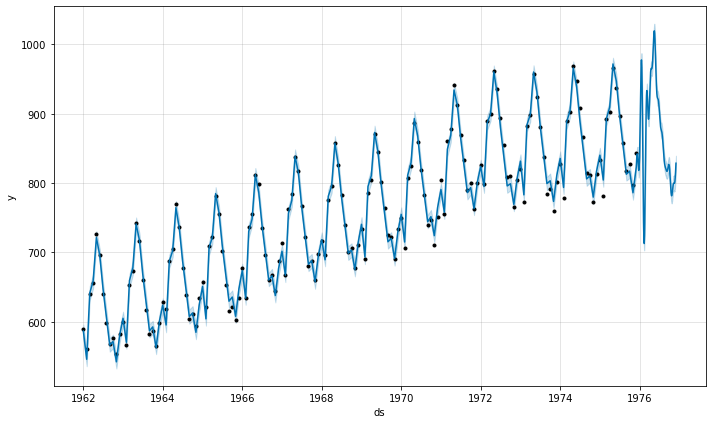

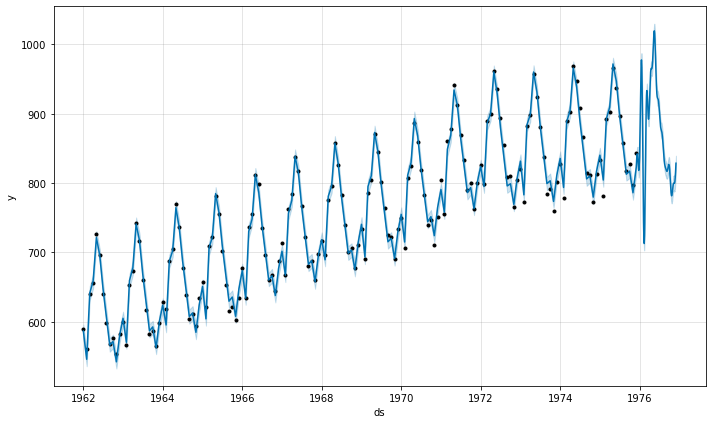

In [ ]:
model.plot(prediction)

##### Visualize Each Components[Trends,Weekly]

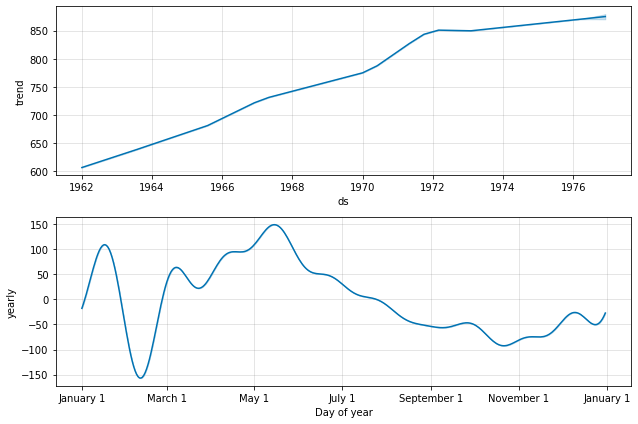

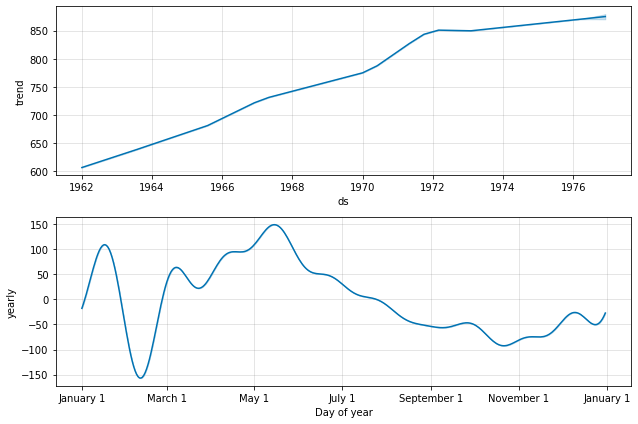

In [ ]:
model.plot_components(prediction)

### Cross Validation

1. Next let’s measure the forecast error using the historical data. 

    * We’ll do this by comparing the predicted values with the actual values. 
    * In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point.
    * Afterwards we compare the actual values to the predicted values.
    
    
2. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

    *  horizon the forecast horizon
    * initial the size of the initial training period
    * period the spacing between cutoff dates

In [ ]:
df.shape

(168, 2)

In [ ]:
from fbprophet.diagnostics  import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [ ]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [ ]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,624.023076,621.739022,626.035726,622.0,1965-01-22
1,1965-03-01,705.442406,699.036526,712.141882,709.0,1965-01-22
2,1965-04-01,719.203883,705.646581,732.407582,722.0,1965-01-22
3,1965-05-01,784.846991,762.667869,806.760813,782.0,1965-01-22
4,1965-06-01,752.915491,721.959472,785.181591,756.0,1965-01-22
5,1965-07-01,695.503885,654.098351,736.342912,702.0,1965-01-22
6,1965-08-01,655.932022,603.930331,708.298501,653.0,1965-01-22
7,1965-09-01,621.956610,558.386090,687.304068,615.0,1965-01-22
8,1965-10-01,629.417825,555.693033,708.576705,621.0,1965-01-22
9,1965-11-01,610.485973,522.743548,704.634234,602.0,1965-01-22


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,850.391835,840.655090,860.426157,858.0,1974-12-01
248,1975-09-01,807.913651,797.717049,818.111502,817.0,1974-12-01
249,1975-10-01,811.402292,801.555062,821.800748,827.0,1974-12-01
250,1975-11-01,779.398005,769.304318,790.817038,797.0,1974-12-01
251,1975-12-01,813.788791,803.215270,825.020167,843.0,1974-12-01


### Obtaining the Performance Metrics

* We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE), Median Absolute Percentage Error(MDAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,249.749766,15.803473,12.138373,0.015543,0.013585,0.40
1,41 days,247.623357,15.736053,12.051842,0.015468,0.013585,0.40
2,42 days,263.336249,16.227638,12.534043,0.016135,0.013797,0.40
3,43 days,265.283178,16.287516,12.784303,0.016532,0.013797,0.38
4,46 days,251.735214,15.866166,12.545135,0.016223,0.013797,0.36


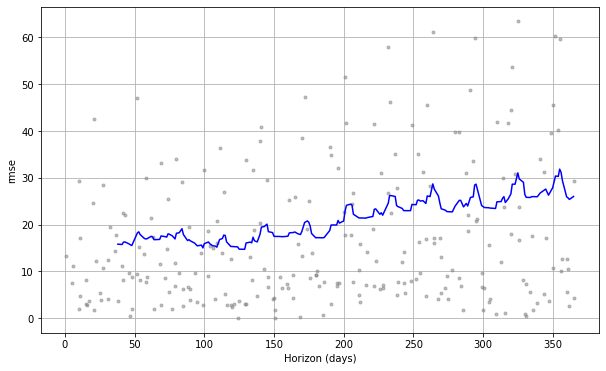

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

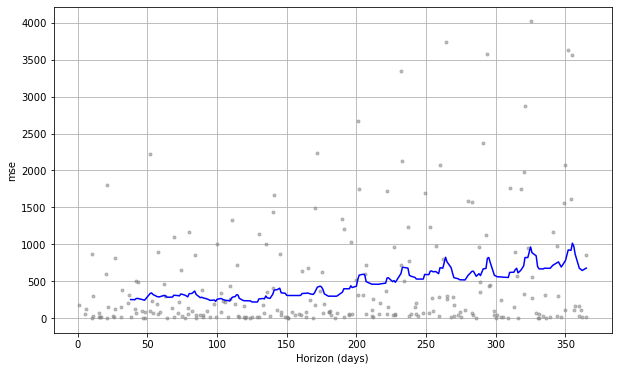

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')